<a href="https://colab.research.google.com/github/Hetav01/ML_Process_Course/blob/main/DIA_Revise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
img1 = cv2.imread("/content/drive/MyDrive/DIA OpenCV/lena_color.png")
print(img1)

[[[125 137 226]
  [130 136 223]
  [118 133 226]
  ...
  [127 145 230]
  [122 148 232]
  [100 114 210]]

 [[125 137 226]
  [130 136 223]
  [118 133 226]
  ...
  [127 145 230]
  [122 148 232]
  [100 114 210]]

 [[124 138 226]
  [121 133 223]
  [117 134 226]
  ...
  [118 133 222]
  [108 125 217]
  [ 90  87 182]]

 ...

 [[ 61  28  90]
  [ 61  28  91]
  [ 63  29  97]
  ...
  [ 71  53 140]
  [ 73  62 158]
  [ 74  59 161]]

 [[ 60  20  85]
  [ 59  25  91]
  [ 62  26  94]
  ...
  [ 82  64 153]
  [ 81  69 172]
  [ 78  65 170]]

 [[ 57  22  82]
  [ 62  30  94]
  [ 61  25  95]
  ...
  [ 84  71 167]
  [ 78  68 178]
  [ 81  72 183]]]


In [4]:
print(img1.shape)
h = img1.shape[0]
w = img1.shape[1]
channels = img1.shape[2]

(256, 256, 3)


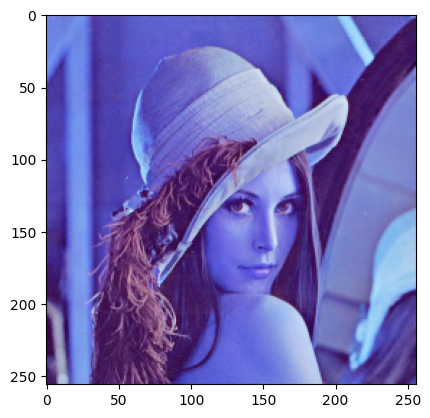

In [5]:
plt.imshow(img1)

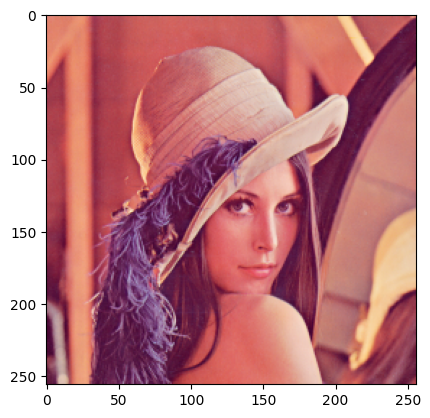

In [9]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [10]:
print(img1.size)
print(img1.dtype)

196608
uint8


In [11]:
px = img1[100, 100]
px

array([ 87,  43, 119], dtype=uint8)

In [14]:
blue = img1[100, 100, 0] #blue is first index as bgr color index.
blue

87

In [13]:
b, g, r = cv2.split(img1)
print(g)

[[137 136 133 ... 145 148 114]
 [137 136 133 ... 145 148 114]
 [138 133 134 ... 133 125  87]
 ...
 [ 28  28  29 ...  53  62  59]
 [ 20  25  26 ...  64  69  65]
 [ 22  30  25 ...  71  68  72]]


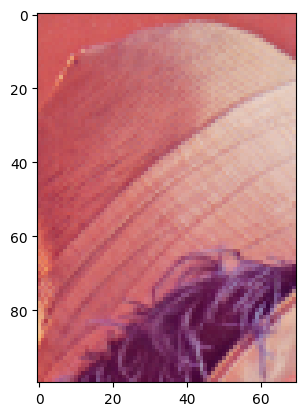

In [15]:
hat = img1[20:120, 70:140]
plt.imshow(cv2.cvtColor(hat, cv2.COLOR_BGR2RGB))

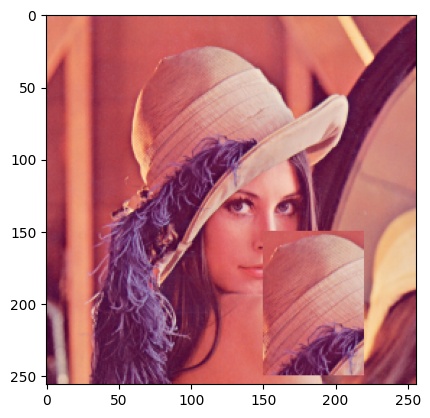

In [16]:
img1[150:250, 150:220] = hat #assigning variable a space in the image.
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

In [17]:
img2 = cv2.imread("/content/drive/MyDrive/DIA OpenCV/musk.jpg")
print(img2)

[[[222 229 249]
  [227 234 254]
  [234 241 255]
  ...
  [169  83  59]
  [169  83  61]
  [171  84  64]]

 [[222 229 249]
  [225 232 251]
  [228 235 254]
  ...
  [169  83  59]
  [168  82  60]
  [171  84  64]]

 [[230 237 255]
  [229 236 255]
  [227 234 253]
  ...
  [168  82  58]
  [168  82  60]
  [171  84  64]]

 ...

 [[136  79  48]
  [142  77  49]
  [151  73  50]
  ...
  [  0   0   3]
  [  5   7   8]
  [  1   0   2]]

 [[138  75  47]
  [141  74  47]
  [147  71  49]
  ...
  [  0   0   3]
  [  6   8   9]
  [  1   0   2]]

 [[135  68  43]
  [139  71  48]
  [144  72  54]
  ...
  [  4   5   9]
  [  0   0   1]
  [  1   0   2]]]


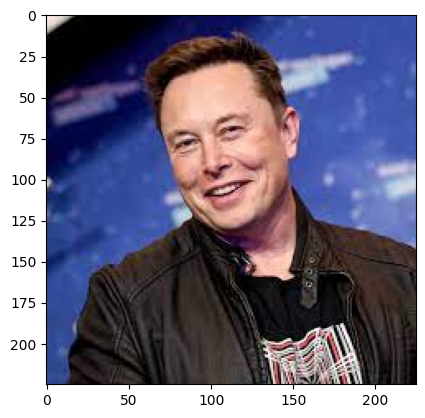

In [18]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [20]:
print(img2.shape)
img2 = cv2.resize(img2, (256, 256))
print(img2.shape)

(225, 225, 3)
(256, 256, 3)


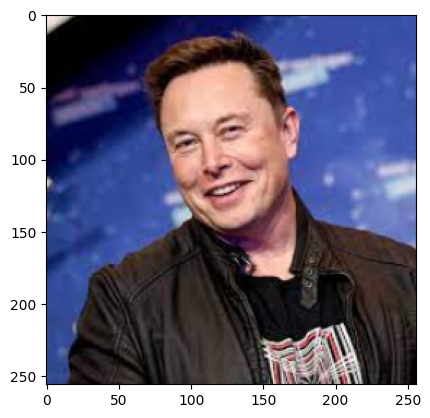

In [21]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

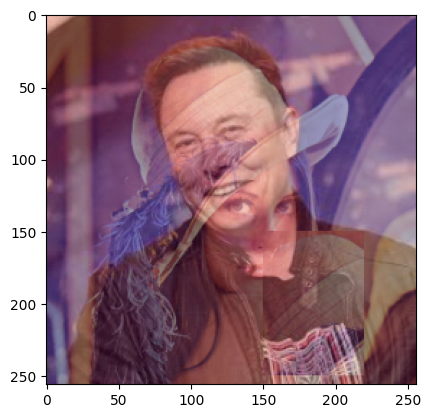

In [29]:
new = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
plt.imshow(cv2.cvtColor(new, cv2.COLOR_BGR2RGB))

In [30]:
star = cv2.imread("/content/drive/MyDrive/DIA OpenCV/starbucks.png")
print(star.shape)

(225, 225, 3)


In [31]:
star = cv2.resize(star, (256, 256))
print(star.shape)

(256, 256, 3)


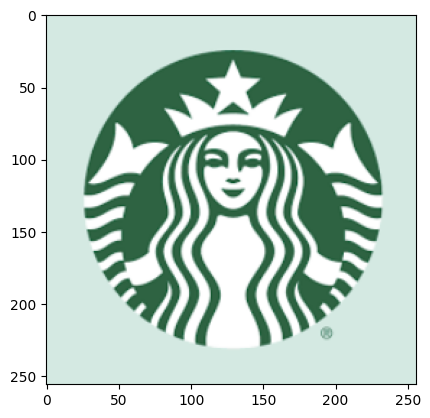

In [32]:
plt.imshow(cv2.cvtColor(star, cv2.COLOR_BGR2RGB))

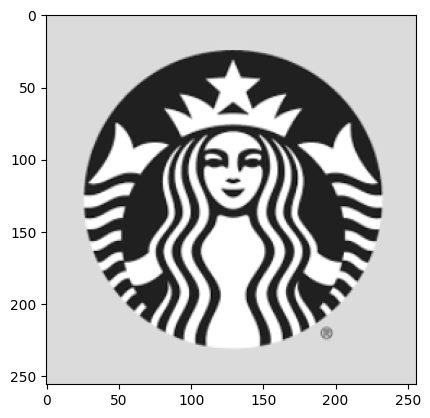

In [33]:
graystar = cv2.cvtColor(star, cv2.COLOR_BGR2GRAY)
plt.imshow(graystar, cmap= "gray")

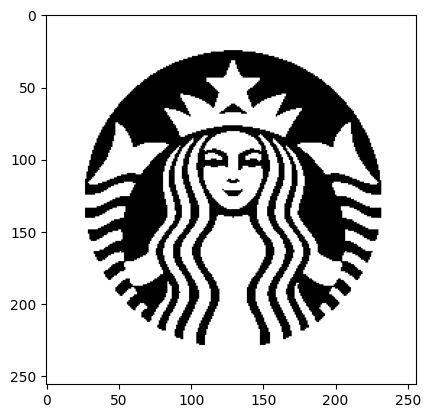

In [36]:
ret,threshstar = cv2.threshold(graystar, 120, 255, cv2.THRESH_BINARY)
plt.imshow(threshstar, cmap='gray')

In [37]:
apple = cv2.imread("/content/drive/MyDrive/DIA OpenCV/apple.png")
print(apple.shape)

(224, 225, 3)


(256, 256, 3)


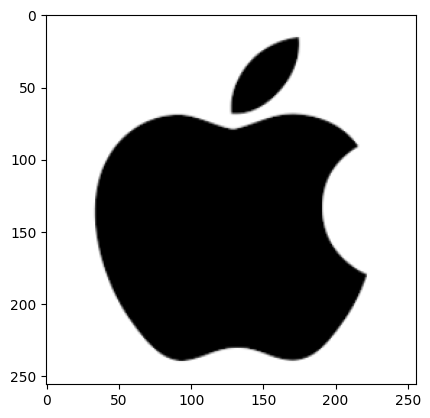

In [39]:
apple = cv2.resize(apple, (256, 256))
print(apple.shape)
grayApple = cv2.cvtColor(apple, cv2.COLOR_BGR2GRAY)
plt.imshow(grayApple, cmap= "gray")

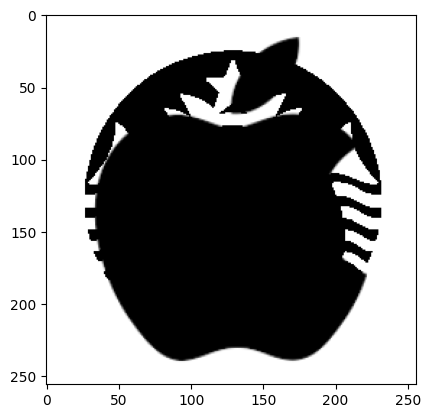

In [44]:
#bitwise operations
img_and = cv2.bitwise_and(threshstar, grayApple, mask= None)
plt.imshow(img_and, cmap= "gray")

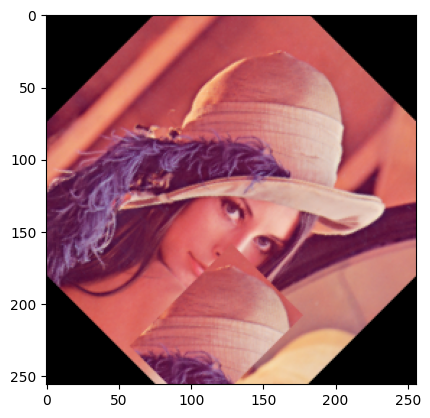

In [48]:
#rotate image
center = (w//2, h//2) #floor division
matrix = cv2.getRotationMatrix2D(center, -45, 1.0)  #calculate the rotated affine matrix.

rotated = cv2.warpAffine(img1, matrix, (w, h))  #impute the image onto the affine matrix.
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))   #display the image.

In [50]:
#put in a rectangle and some text.
output = img1.copy()

In [54]:
#using a rectangle function to create a rectangle.
reactangle = cv2.rectangle(output, (100, 200), (200, 100), (0, 255, 255), 2)

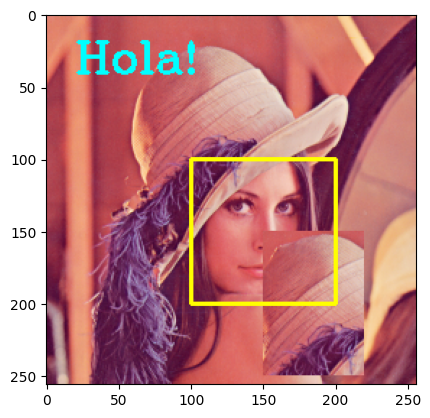

In [55]:
text = cv2.putText(reactangle, "Hola!", (20, 40), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 0), 2)
plt.imshow(cv2.cvtColor(text,cv2.COLOR_BGR2RGB))

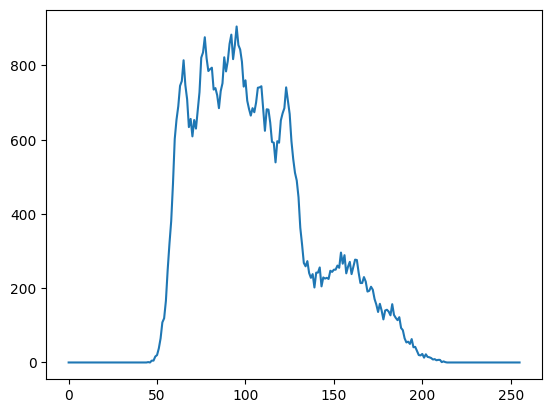

In [58]:
histb=cv2.calcHist([img1],[0],None,[256],[0,256])
plt.plot(histb)

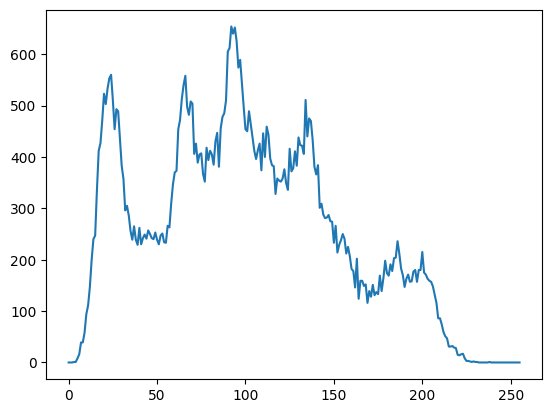

In [59]:
histb=cv2.calcHist([img1],[1],None,[256],[0,256])
plt.plot(histb)

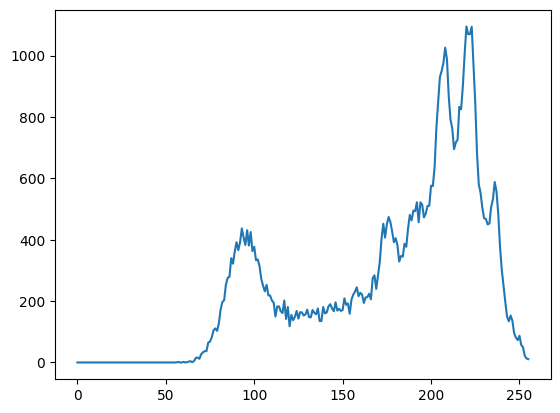

In [66]:
histb=cv2.calcHist([img1],[2],None,[256],[0,256])
plt.plot(histb)

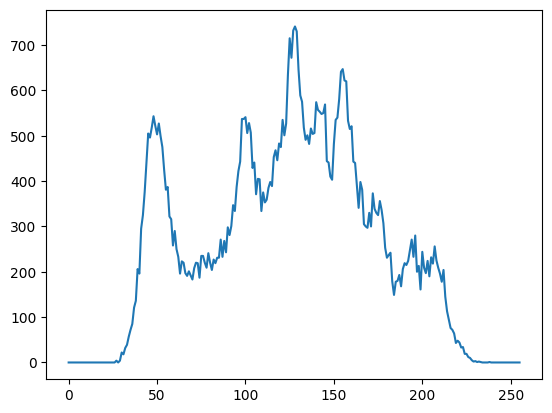

In [61]:
#histogram of gray image
gray_img=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
histg=cv2.calcHist([gray_img],[0],None,[256],[0,256])
plt.plot(histg)

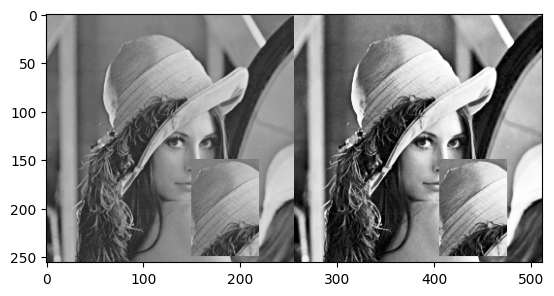

In [68]:
equ = cv2.equalizeHist(gray_img)
res = np.hstack((gray_img, equ))
plt.imshow(res, cmap= "gray")

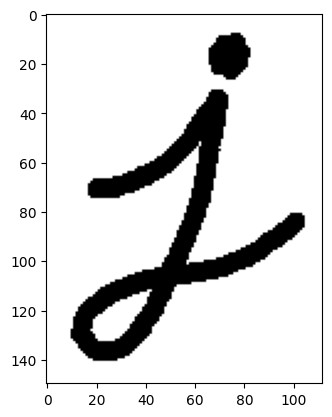

In [69]:
#morphology

img = cv2.imread("/content/drive/MyDrive/DIA OpenCV/j_original.png")
plt.imshow(img,cmap='gray')

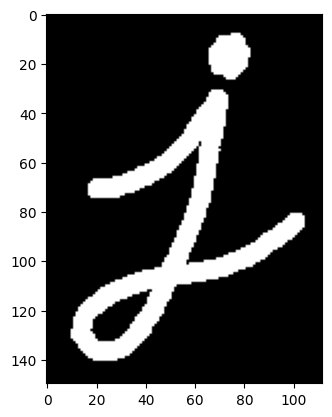

In [70]:
img = cv2.bitwise_not(img)
plt.imshow(img, cmap= "gray")

In [73]:
kernel = np.ones((5, 5), np.uint8)
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


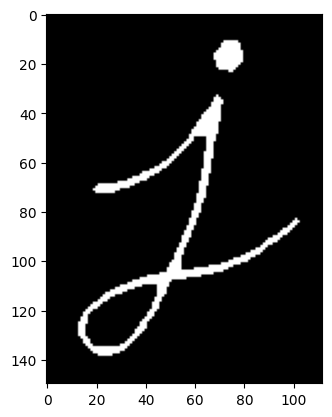

In [77]:
img_eroded = cv2.erode(img, kernel, iterations= 1)
plt.imshow(img_eroded,cmap='gray')

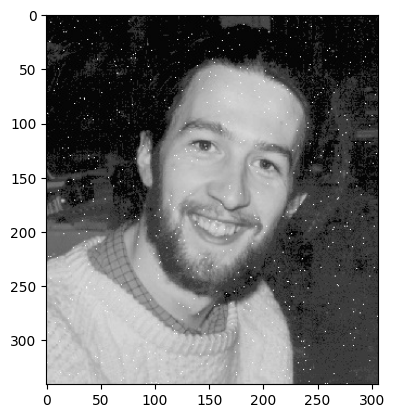

In [78]:
img=cv2.imread("/content/drive/MyDrive/DIA OpenCV/saltman.jpg")
plt.imshow(img, cmap= 'gray')

In [83]:
kernell = np.ones((3, 3), np.uint8)
img_dilated = cv2.erode(img, kernell, iterations= 1)

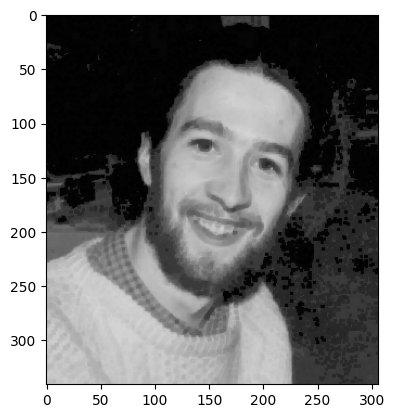

In [84]:
plt.imshow(img_dilated, cmap= "gray")

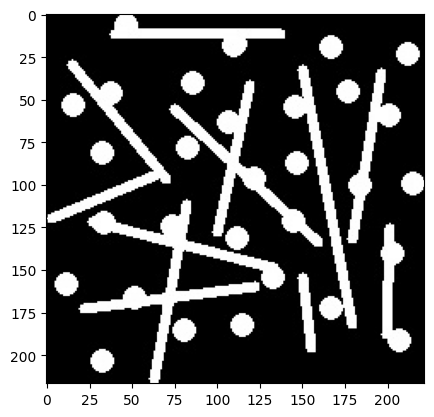

In [85]:
img=cv2.imread("/content/drive/MyDrive/DIA OpenCV/lines_circles.jpg")
plt.imshow(img,cmap='gray')

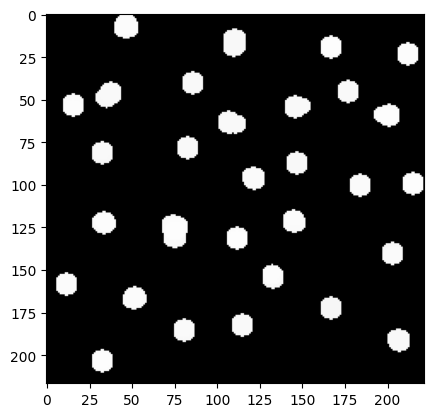

In [86]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
img_open = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel2)
plt.imshow(img_open, cmap= "gray")

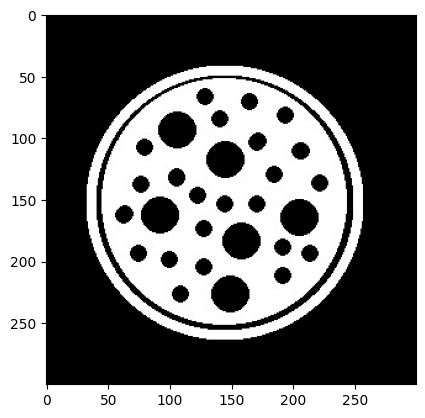

In [87]:
img3=cv2.imread("/content/drive/MyDrive/DIA OpenCV/plate.jpg")
plt.imshow(img3,cmap='gray')

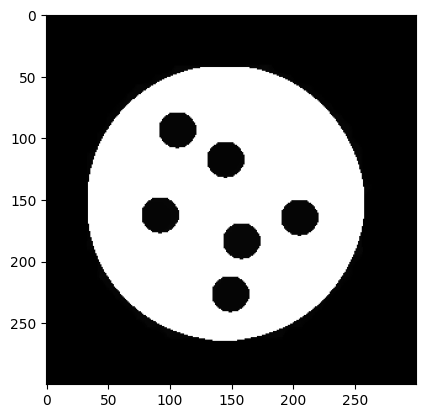

In [89]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (22, 22))
img_close = cv2.morphologyEx(img3, cv2.MORPH_CLOSE, kernel3)
plt.imshow(img_close,cmap='gray')

In [90]:
pip install -U notebook-as-pdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 13.4 MB/s eta 0:00:00
